# Capstone Project By: Sridhar Kumar

### Credit Card Fraud Detection

### Business Understanding

**Research Goal:** Develop a model to accurately predict fraudulent credit card transactions

**Research Importance:** Financial fraud has significant negative economic impacts, affecting both businesses and consumers. If unanswered, businesses may face financial losses and damage to their reputations. While on the other hand, consumers could suffer from identity theft and financial insecurity. By predicting fraudulent transactions, my analysis will enable financial institutions to implement proactive measures, reduce fraud losses and enhance overall customer trust. More importantly, this analysis will allow stakeholders to understand risks and develop actionable strategies.

### Data

Data Sourced From Kaggle: (https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data)

Brief Description of dataset: This dataset contains credit card transactions from September 2013 by European cardholders. It comprises transactions from two days, totaling 284,807 transactions with 492 identified as fraud. This dataset was noted as being a highly unbalanced dataset with fraudulent transactions only accounting for 0.172% of all transactions.

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

### Exploratory Data Analysis (EDA)

In [3]:
df = pd.read_csv('data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.isnull().sum() #checking for null values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

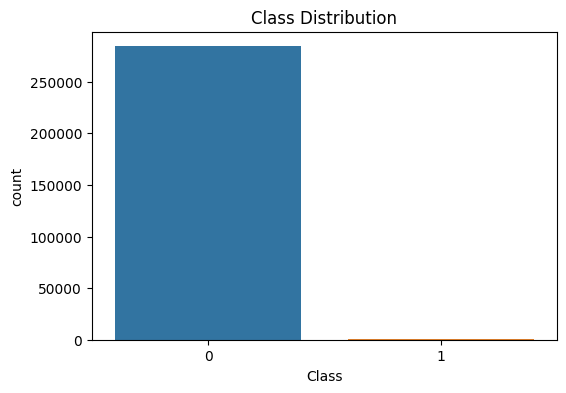

In [6]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

In order to combat the imbalance in this dataset, I will use downsampling. This approach helps avoid potential bias in the model's learning. An imbalanced dataset may yield high accuracy for the model, but it will perform poorly in detecting fraud. This is primarily because it will be trained on data that is predominantly non-fraudulent.

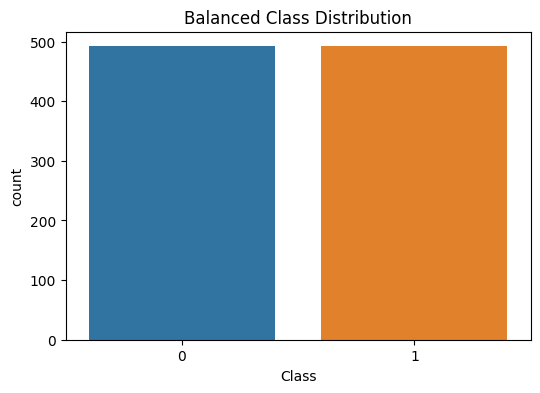

New dataset shape: (984, 31)


In [7]:
# Separate  classes
df_majority = df[df['Class'] == 0]  # Non-fraudulent transactions
df_minority = df[df['Class'] == 1]  # Fraudulent transactions

df_majority_downsampled = df_majority.sample(n=len(df_minority), random_state=42) # Downsample majority class


df_balanced = pd.concat([df_majority_downsampled, df_minority]) # Combine with the minority class

# Shuffle dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Check new class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df_balanced)
plt.title('Balanced Class Distribution')
plt.show()

print(f"New dataset shape: {df_balanced.shape}") # Now data should be balanced!


### Baseline Model: Logistic Regression

Accuracy: 0.9340
Confusion Matrix:
[[108   2]
 [ 11  76]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       110
           1       0.97      0.87      0.92        87

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197



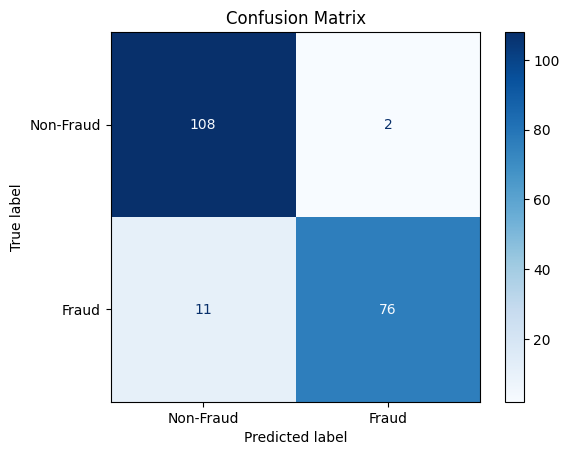

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# After balancing the dataset
X = df_balanced.drop(columns=['Class'])    # Features
y = df_balanced['Class']                   # Target variable

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression(max_iter=2000)  # Increased iterations
model.fit(X_train, y_train)

y_pred = model.predict(X_test)  # Predictions

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# confusion matrix visualized
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                               display_labels=['Non-Fraud', 'Fraud'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

### Using The Random Forest Model

Accuracy: 0.9289
Confusion Matrix:
[[110   0]
 [ 14  73]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       110
           1       1.00      0.84      0.91        87

    accuracy                           0.93       197
   macro avg       0.94      0.92      0.93       197
weighted avg       0.94      0.93      0.93       197



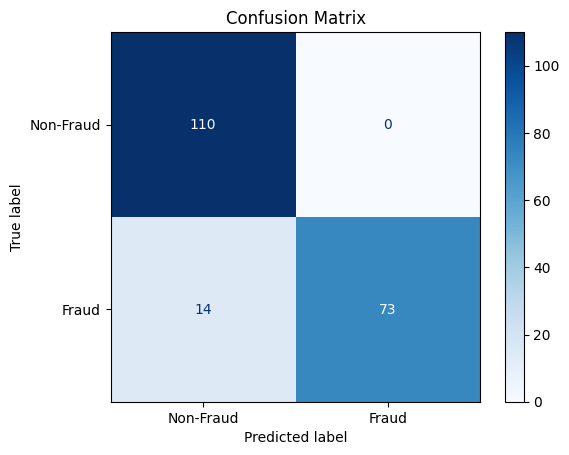

In [27]:
from sklearn.ensemble import RandomForestClassifier

# Prepare features and target variable
X = df_balanced.drop('Class', axis=1)    # Features 
y = df_balanced['Class']                 # Target variable 

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees

# Train model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


# confusion matrix visualized
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                               display_labels=['Non-Fraud', 'Fraud'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

Logistic Regression performs slightly better in terms of accuracy, recall, and F1-score for the positive class (fraud). However, Random Forest has the advantage of perfect precision (zero false positives) for class 1, making it a strong choice if avoiding false positives is a priority.

### Using The SVM Model On A Unbalanced Dataset

In [11]:
from sklearn.svm import SVC

# Prepare features and target variable
X = df.drop('Class', axis=1)    # Features 
y = df['Class']                 # Target variable 

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create SVM classifier
svm_model = SVC(kernel='linear', random_state=42)  # Using a linear kernel

# Train model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.9993
Confusion Matrix:
[[56847    17]
 [   21    77]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.79      0.80        98

    accuracy                           1.00     56962
   macro avg       0.91      0.89      0.90     56962
weighted avg       1.00      1.00      1.00     56962



The SVM model achieved a high accuracy of 99.93%, but this is very misleading because the dataset is not balanced (unlike logistic Regression and Random Tree). Looking at the confusion matrix, it did correctly identify 77 out of the 98 fraudulent cases, but it also misclassified 21 fraud cases as non-fraudulent; this resulted in a recall of 79% for the minority class. Again, this test was just to show how crucial it is to balance datasets, especially for cases where the data is usually unbalanced like Credit Fraud Detection. 

Recall is a big concern in fraud detection because it indicates the model's ability to correctly identify fraudulent transactions. A model with low recall can lead to significant financial losses and increases the risk due to false negatives. In fraud detection, the cost of failing to catch a fraudulent case is much higher than misclassifying a legitimate transaction, making high recall crucial. Accuracy is a good measure of how effective a model is, though it is not the sole focus. While precision (accuracy of positive predictions) and the F1-score (balance of precision and recall) are important, it should be secondary to recall.

### Improving The Model: Random Forest

Accuracy: 0.9289
Confusion Matrix:
[[109   1]
 [ 13  74]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       110
           1       0.99      0.85      0.91        87

    accuracy                           0.93       197
   macro avg       0.94      0.92      0.93       197
weighted avg       0.93      0.93      0.93       197



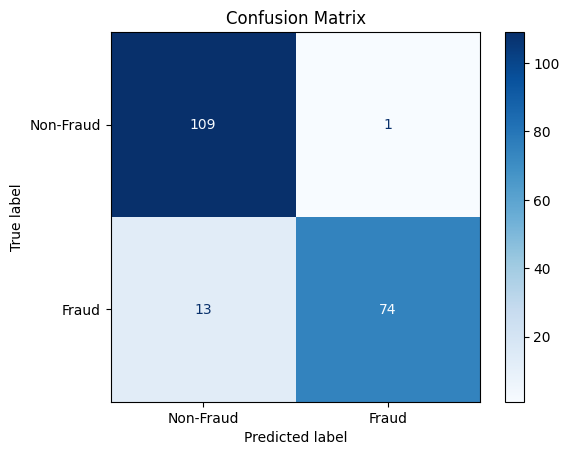

In [28]:
X = df_balanced.drop('Class', axis=1)  
y = df_balanced['Class']                
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest classifier with class weights
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)  # 100 trees


rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# confusion matrix visualized
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                               display_labels=['Non-Fraud', 'Fraud'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

This model shows high accuracy and precision, particularly for classifying fraudulent transactions which is fantastic. The recall for non-fraudulent transactions is also excellent (99%), meaning very few legitimate transactions are incorrectly flagged as fraudulent. The thing to improve with this model is to increase the recall score for the fraudulent cases.  

### Feature Importance

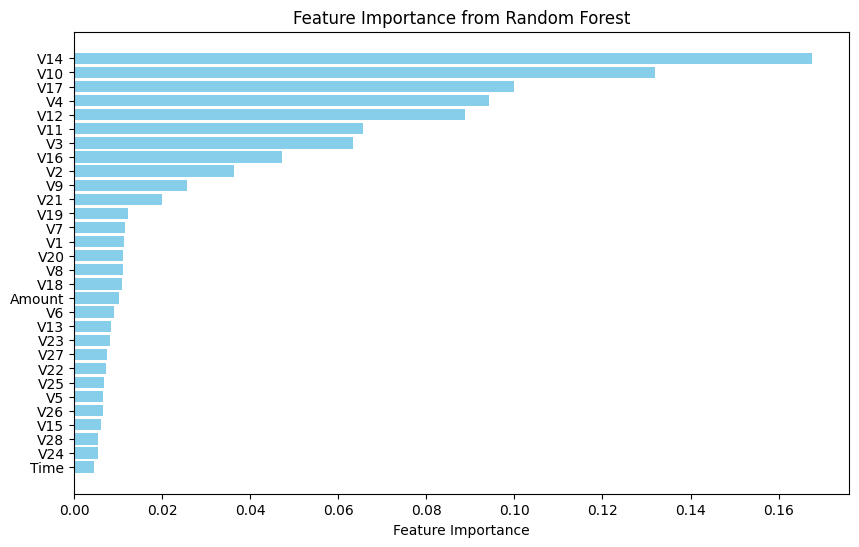

In [19]:
# feature importance
importances = rf_model.feature_importances_
feature_names = X.columns

# DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()


In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = df_balanced.drop('Class', axis=1) 
y = df_balanced['Class']              

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define model
rf_model = RandomForestClassifier(random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Set up grid search
grid_search = GridSearchCV(estimator=rf_model,
                           param_grid=param_grid,
                           scoring='f1',  
                           cv=5,  # 5-fold cross-validation
                           verbose=2,
                           n_jobs=-1) 

# Fit model
grid_search.fit(X_train, y_train)

# Get best parameters/model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")

# Evaluate best model
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.9289
Confusion Matrix:
[[109   1]
 [ 13  74]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       110
           1       0.99      0.85      0.91        87

    accuracy                           0.93       197
   macro avg       0.94      0.92      0.93       197
weighted avg       0.93      0.93      0.93       197



Even after performing grid search, the results are identical. This is probably due to the fact that the initial Random Forest model used effective default hyperparameters. Also, the range of hyperparameters explored may not have been broad enough to find better options. Finally, increased complexity from tuning may not lead to significant improvements, since simpler models can perform just as well with limited data.

In [14]:
from sklearn.model_selection import cross_val_score
import numpy as np

X = df_balanced.drop('Class', axis=1) 
y = df_balanced['Class']              

rf_model = RandomForestClassifier(random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='f1')  # Using 5-fold cross-validation

# Print results
print(f"Cross-Validation F1 Scores: {cv_scores}")
print(f"Mean F1 Score: {np.mean(cv_scores):.4f}")


Cross-Validation F1 Scores: [0.92631579 0.95833333 0.92553191 0.93478261 0.94791667]
Mean F1 Score: 0.9386


The cross-validation scores are close to each other, indicating consistent model performance across different data subsets. The mean F1 score of 0.9386 reflects strong overall performance, effectively balancing precision and recall.

Accuracy: 0.9340
Confusion Matrix:
[[108   2]
 [ 11  76]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       110
           1       0.97      0.87      0.92        87

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197



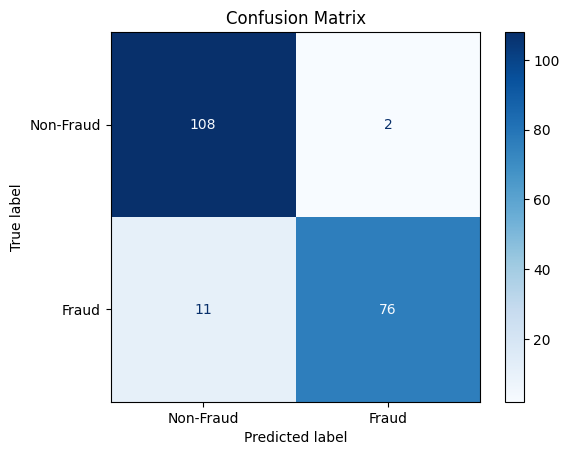

In [19]:
from xgboost import XGBClassifier

X = df_balanced.drop('Class', axis=1)     # Features 
y = df_balanced['Class']                 # Target variable 

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost classifier
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

# Train model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Confusion matrix visualized
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                               display_labels=['Non-Fraud', 'Fraud'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

Recommended Model Usage:

If the priority is to minimize false positives while still maintaining reasonable recall, the Improved Random Forest model is a strong choice due to its high precision.

If the focus is on detecting as many fraudulent transactions as possible, then Logistic Regression or XGBoost would be preferable, as they offer higher recall.

### Testing one more model: LightGBM

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

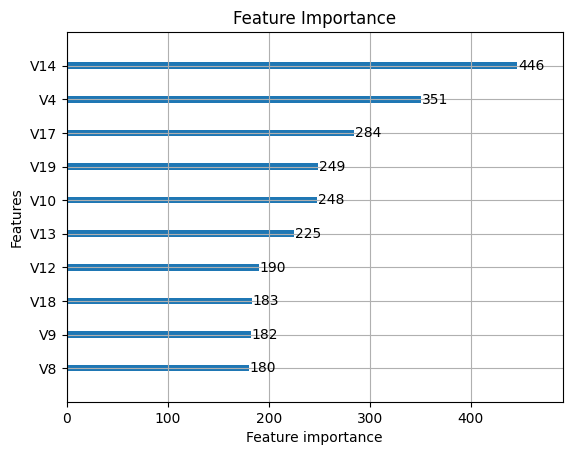

In [34]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

X = df_balanced.drop('Class', axis=1)  # Features
y = df_balanced['Class']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the LightGBM classifier 
lgb_model = lgb.LGBMClassifier(
    num_leaves=50,
    max_depth=-1,
    learning_rate=0.1,
    n_estimators=100,
    min_data_in_leaf=10,
    min_child_samples=10  # Set to match min_data_in_leaf
)

# Fit the model with early stopping
evals = [(X_train, y_train), (X_test, y_test)]
lgb_model.fit(X_train, y_train, eval_set=evals, eval_metric='logloss')

# Make predictions
y_pred = lgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Plot feature importance
lgb.plot_importance(lgb_model, max_num_features=10, importance_type='split', title='Feature Importance')
plt.show()

By far, the LightGBM model showed the most impressive performance. It achieved an accuracy of about 95%, and its confusion matrix showed that the model performed very well. The model had high precision and recall for both classes. To be specific, the precision values were 0.93 for Class 0 and 0.97 for Class 1, with F1-scores of 0.95 for each class. However, it is important to note that (some) warnings occurred during model training (related to the parameters min_data_in_leaf and min_child_samples). The warning seemed to indicate that the min_child_samples was being ignored due to its lower value, but we had difficulty resolving the warnings. Despite these warnings, the model's metrics remained consistent across multiple runs. Therefore, while acknowledging the warnings, we feel confident in the model's results.

### Conclusion

If the goal was to minimize false positives while also maintaining a good recall score, the Random forest model is a good choice. This is because it has very good precision. On the other hand, it is also important to realize that its lower recall, compared to the other models, may result in missing potential fraudulent transactions. 

If there was an increased focus on trying to maximize fraud detections, then LightGBM and XGBoost are great choices. This is specifically due to the fact that they achieve higher recall while also maintaining precision. It seems to be better at balancing the task of identifying fraud and minimizing potential false positives. 

Best Model: Since the research goal was to develop a model that accurately predicts fraudulent credit card transactions, the best model should be a model that balances precision and recall. The model that executed this the best was the LightGBM model. The main strengths of the model was its ability to reduce false positives while also capturing a large portion of fraudulent cases. This makes this model a great choice for practical deployment, aiding to the research motivation. The model also has a high accuracy (about 95%). Overall, the LightGBM model seems best in distinguishing between fraud and non-fraudulent transactions. Therefore, answering the research objective effectively. 

### Future Work

Some future work would definitely involve resolving the warning messages from the LightGBM model. It would also be worthwhile to look into ensemble techniques and see if that improves the metrics (maybe even combining LightGBM with neural networks). Taking a step back to the EDA process, a deeper dive into advanced feature engineering may prove worthwhile. Ultimately, these explorations could lead to a more powerful fraud detection system capable of adapting to evolving fraudulent behaviors.